In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Verify Access to PDFs

In [3]:
import os

# Path to the FORUM folder on Google Drive
folder_path = '/content/drive/My Drive/FORUM'
files = os.listdir(folder_path)
print(files)

['forum_fall24.pdf', 'forum_summer2024.pdf', 'forum_spring2024.pdf', 'forum_winter2024.pdf', 'Forum_summer2023.pdf', 'Forum_Spring2023.pdf', 'Forum_Winter2023.pdf', 'Forum_fall2022.pdf', 'Forum_summer2022.pdf', 'Forum_spring2022.pdf', 'Forum_winter2021.pdf', 'Forum_fall2021.pdf', 'Forum_summer2021.pdf', 'Forum_Spring2021.pdf', 'Forum_fall2020.pdf', 'Forum_summer2020.pdf', 'Forum_Spring2020.pdf', 'Forum_Fall2019.pdf', 'Forum_Summer2019.pdf', 'Forum_Spring2019.pdf', 'Forum_winter2018.pdf', 'Forum_summer2018.pdf', 'Forum_spring2018.pdf', 'Forum_fall2017.pdf', 'Forum_Summer2017.pdf', 'forum_spring_17.pdf', 'forum_fall_16.pdf', 'forum_summer_16.pdf', 'forum-spring2016.pdf', 'forum11_15.pdf', 'forum08_15.pdf', 'forum05_15.pdf', 'forum10_14.pdf', 'forum08_14.pdf', 'forum05_14.pdf', 'forum10_13.pdf', 'forum07_13.pdf', 'forum04_13.pdf', 'forum10_12.pdf', 'forum08_12.pdf', 'forum05_12.pdf', 'forum11_11.pdf', 'forum08_11.pdf', 'forum05_11.pdf', 'forum10_10.pdf', 'forum08_10.pdf', 'forum05_10.pdf'

Baseline Model

In [4]:
!pip install PyPDF2
!pip install nltk
import PyPDF2
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [5]:
# Extract Text from PDFs
def extract_text_from_pdf(file_path):
    text = ''
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text() if page.extract_text() else ''
    return text

# Loop through each file and extract text
all_texts = []
for file_name in files:
    if file_name.lower().endswith('.pdf'):
        file_path = os.path.join(folder_path, file_name)
        file_text = extract_text_from_pdf(file_path)
        all_texts.append(file_text)

In [6]:
# Preprocess Text

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text) # Splits text into indivdiual words or tokens
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Keep alphabetic words only
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Stem words
    return tokens

processed_texts = [preprocess_text(text) for text in all_texts]

In [7]:
## Topic Modeling

!pip install gensim
from gensim import corpora, models

# Create dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.028*"veteran" + 0.019*"care" + 0.017*"va" + 0.014*"health"')
(1, '0.048*"suicid" + 0.018*"risk" + 0.012*"prevent" + 0.009*"kill"')
(2, '0.016*"va" + 0.012*"research" + 0.010*"care" + 0.010*"health"')
(3, '0.020*"va" + 0.018*"care" + 0.015*"veteran" + 0.013*"caregiv"')
(4, '0.000*"care" + 0.000*"veteran" + 0.000*"va" + 0.000*"health"')
(5, '0.026*"care" + 0.022*"va" + 0.017*"health" + 0.015*"patient"')
(6, '0.000*"care" + 0.000*"va" + 0.000*"veteran" + 0.000*"health"')
(7, '0.029*"care" + 0.021*"veteran" + 0.019*"va" + 0.019*"health"')
(8, '0.018*"data" + 0.015*"research" + 0.011*"va" + 0.010*"health"')
(9, '0.022*"care" + 0.020*"va" + 0.020*"health" + 0.017*"research"')


In [8]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


Coherence Score: 0.32945572929974454


In [9]:
!pip install pyLDAvis
import pyLDAvis.gensim_models

In [10]:
# Link Trends to Specific Years

import re

# Extract Date from Filename
def extract_date_from_filename(filename):
    match = re.search(r'\d{4}', filename)
    if match:
        return match.group()
    return None

# Create a list of tuples (year, text)
texts_with_dates = [(extract_date_from_filename(file), text) for file, text in zip(files, all_texts)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Aggregate Texts by Year

from collections import defaultdict

# Aggregate texts by year
texts_by_year = defaultdict(list)
for year, text in texts_with_dates:
    texts_by_year[year].append(text)

# Concatenate texts of the same year
concatenated_texts_by_year = {year: ' '.join(texts) for year, texts in texts_by_year.items()}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Process and Model Each Year's
processed_texts_by_year = {year: preprocess_text(text) for year, text in concatenated_texts_by_year.items()}

# Create dictionary and corpus for each year, and apply LDA model
lda_models_by_year = {}
for year, texts in processed_texts_by_year.items():
    dictionary = corpora.Dictionary([texts])
    corpus = [dictionary.doc2bow(texts)]
    lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
    lda_models_by_year[year] = lda_model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Analyze Topic Changes Over Time

for year, model in lda_models_by_year.items():
    print(f"Year: {year}")
    topics = model.print_topics(num_words=4)
    for topic in topics:
        print(topic)

Year: None
(0, '0.001*"care" + 0.001*"research" + 0.001*"va" + 0.001*"health"')
(1, '0.002*"care" + 0.001*"va" + 0.001*"health" + 0.001*"research"')
(2, '0.027*"care" + 0.020*"va" + 0.019*"health" + 0.015*"research"')
(3, '0.001*"care" + 0.001*"va" + 0.001*"health" + 0.001*"research"')
(4, '0.000*"care" + 0.000*"va" + 0.000*"research" + 0.000*"health"')
Year: 2024
(0, '0.001*"veteran" + 0.001*"homeless" + 0.001*"suicid" + 0.001*"care"')
(1, '0.001*"veteran" + 0.001*"va" + 0.001*"suicid" + 0.001*"care"')
(2, '0.001*"veteran" + 0.001*"homeless" + 0.001*"va" + 0.001*"health"')
(3, '0.001*"veteran" + 0.001*"va" + 0.000*"suicid" + 0.000*"care"')
(4, '0.028*"veteran" + 0.015*"va" + 0.013*"homeless" + 0.013*"suicid"')
Year: 2023
(0, '0.003*"va" + 0.002*"care" + 0.002*"veteran" + 0.002*"caregiv"')
(1, '0.027*"va" + 0.025*"care" + 0.023*"veteran" + 0.018*"caregiv"')
(2, '0.001*"va" + 0.001*"care" + 0.001*"veteran" + 0.001*"caregiv"')
(3, '0.001*"va" + 0.001*"care" + 0.001*"veteran" + 0.001*"car

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import re

topic_weights = {}

for year, model in lda_models_by_year.items():
    topic_weights[year] = {}
    # Get topic information from the model using print_topics
    topics = model.print_topics(num_words=4)
    for topic_info in topics:
        _, description = topic_info
        words_weights = description.split('+')
        for word_weight in words_weights:
            weight, word = word_weight.split('*')
            word = word.strip().replace('"', '')  # Clean the word to remove extra quotes
            weight = float(weight.strip())
            if word in topic_weights[year]:
                topic_weights[year][word] += weight  # Sum weights if word appears in multiple topics
            else:
                topic_weights[year][word] = weight

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Get a list of all PDF files in the folder
pdf_file_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path) if file_name.lower().endswith('.pdf')]

extracted_texts = [extract_text_from_pdf(file_path) for file_path in pdf_file_paths]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document 1: veteran homeless countri fought defend va commit end homeless among veteran nation duti ensur veteran place call home although signific progress made prevent end veteran homeless recent data depart ho ...

Document 2: potenti precis oncolog access promis precis implement challeng incorpor precis medicin effort understand factor enhanc cancer detect diagnosi medicin lesson learn impact pharmacogenom test va healthca ...

Document 3: critic role va health servic menopaus transit oppor use share understand pregnanc engag women veteran research play partnership tuniti prevent intervent individu mental health servic matern care women ...

Document 4: veteran health administr vha made commit whole health approach healthcar empow equip veteran take charg health live live commit respons recognit countri built healthcar system effect treat mani diseas ...

Document 5: tumultu time requir novel anthropolog offer insight whole health improv veteran research point import studi point ra

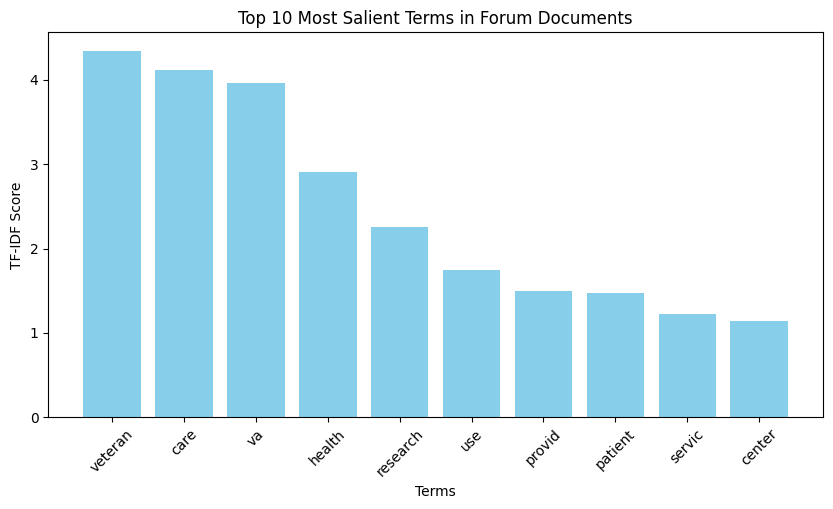

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_tokens)

# Preprocess all extracted texts
processed_texts = [preprocess_text(text) for text in extracted_texts]

from collections import defaultdict

texts_by_year = defaultdict(list)
for year, text in texts_with_dates:
    if year:
        texts_by_year[year].append(preprocess_text(text))

# Flatten grouped texts for analysis
corpus = [' '.join(docs) for docs in texts_by_year.values()]
for i, doc in enumerate(corpus[:5]):
    print(f"Document {i + 1}:", doc[:200], "...\n")

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
tfidf_matrix = vectorizer.fit_transform(corpus)

# Extract terms and scores
feature_names = vectorizer.get_feature_names_out()
scores = tfidf_matrix.sum(axis=0).A1  # Sum scores for each term

import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame for terms and scores
term_scores = pd.DataFrame({'term': feature_names, 'score': scores}).sort_values(by='score', ascending=False)

# Plot the top 10 terms
plt.figure(figsize=(10, 5))
plt.bar(term_scores['term'], term_scores['score'], color='skyblue')
plt.title('Top 10 Most Salient Terms in Forum Documents')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


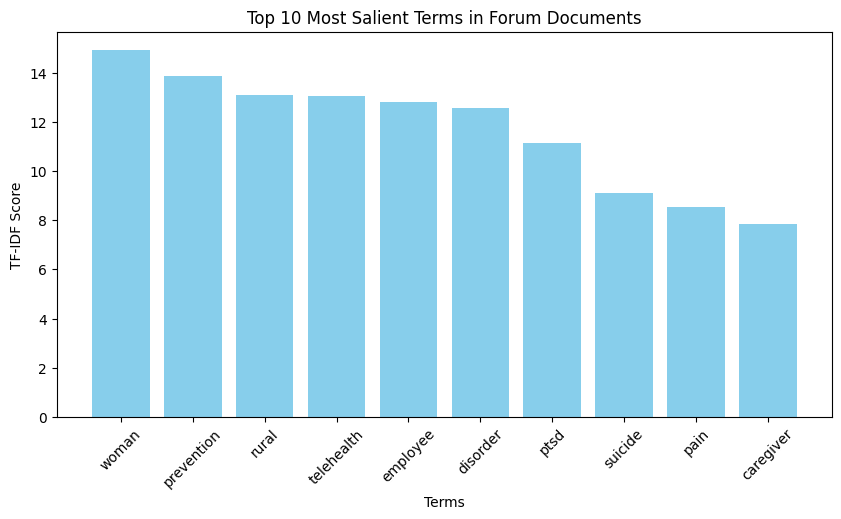

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd

# Preprocessing function
stop_words = set(stopwords.words('english'))
custom_stop_words = {'va', 'health', 'care', 'phd', 'safety', 'innovation', 'decision', 'performance', 'research', 'service', 'technology', 'md', 'communication', 'center'}
stop_words.update(custom_stop_words)

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_tokens)

corpus = [preprocess_text(doc) for doc in extracted_texts]

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.8, min_df=2, max_features=10)
tfidf_matrix = vectorizer.fit_transform(corpus)

# Extract terms and scores
feature_names = vectorizer.get_feature_names_out()
scores = tfidf_matrix.sum(axis=0).A1

# Create DataFrame
term_scores = pd.DataFrame({'term': feature_names, 'score': scores}).sort_values(by='score', ascending=False)

# Plot Top Terms
plt.figure(figsize=(10, 5))
plt.bar(term_scores['term'], term_scores['score'], color='skyblue')
plt.title('Top 10 Most Salient Terms in Forum Documents')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


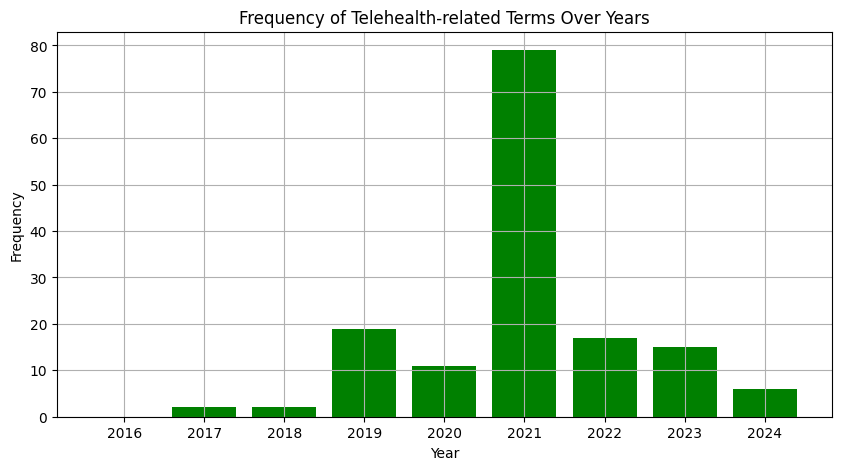

In [18]:
from collections import defaultdict, Counter

# Define list of telehealth-related terms
telehealth_terms = ["telehealth", "telemedicine", "virtual care", "remote monitoring",
                     "online consultation", "digital health", "mhealth"]

# Create dictionary to store documents by year
documents_by_year = defaultdict(list)

for year, text in texts_with_dates:
    if year:  # Check if year is not None
        documents_by_year[year].append(text)

# Calculate frequency of telehealth-related terms per year
telehealth_freq = {}
for year, docs in documents_by_year.items():
    year_counter = Counter()
    for doc in docs:
        words = doc.split()
        year_counter.update(words)
    telehealth_freq[year] = sum(year_counter.get(term, 0) for term in telehealth_terms)

# Plot frequencies
years = sorted(telehealth_freq.keys())
values = [telehealth_freq[year] for year in years]

plt.figure(figsize=(10, 5))
plt.bar(years, values, color='green')
plt.title('Frequency of Telehealth-related Terms Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
# Sentiment Analysis of Telehealth Over Years

telehealth_sentences_by_year = {}

for year, docs in documents_by_year.items():
    telehealth_sentences_by_year[year] = []
    for doc in docs:
        sentences = doc.split('. ')  # Split text into sentences
        for sentence in sentences:
            if any(term in sentence.lower() for term in telehealth_terms):
                telehealth_sentences_by_year[year].append(sentence)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from statistics import mean

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for telehealth-related sentences
sentiment_scores_by_year = {}

for year, sentences in telehealth_sentences_by_year.items():
    sentiments = [sid.polarity_scores(sentence)['compound'] for sentence in sentences]
    if sentiments:
        sentiment_scores_by_year[year] = mean(sentiments)  # Average sentiment score
    else:
        sentiment_scores_by_year[year] = 0  # Default to neutral if no sentences

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


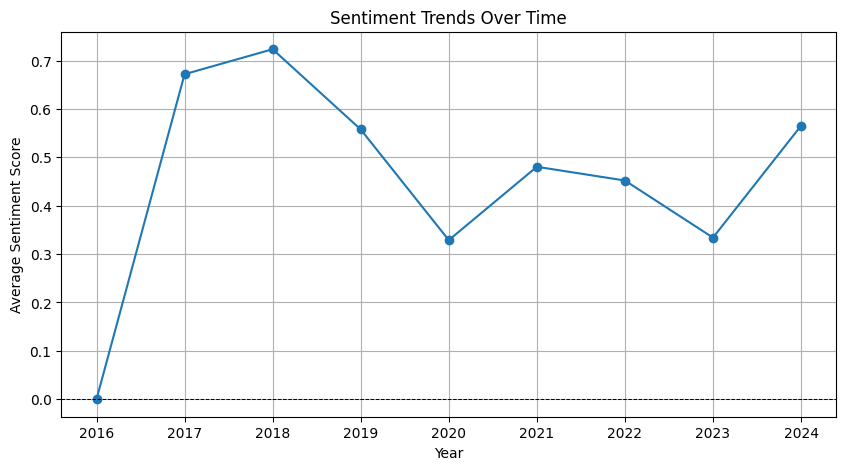

In [21]:
import matplotlib.pyplot as plt

years = sorted(sentiment_scores_by_year.keys())
scores = [sentiment_scores_by_year[year] for year in years]

plt.figure(figsize=(10, 5))
plt.plot(years, scores, marker='o', linestyle='-')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Neutral sentiment line
plt.show()

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

labels = [0] * len(texts)  # Example: Assigning all labels to 0 initially

# Create a NumPy array from texts and labels
data = np.array(list(zip(texts, labels)))

texts = data[:, 0].astype(str).tolist()
labels = data[:, 1].tolist()

# Tokenizing and padding sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=250, padding='post', truncating='post')

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Building the LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=250),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Convert y_train and y_test to NumPy arrays with dtype=int
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

# Train the LSTM model
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 296ms/step - accuracy: 1.0000 - loss: 0.1531 - val_accuracy: 1.0000 - val_loss: 6.7867e-04
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 267ms/step - accuracy: 1.0000 - loss: 5.4414e-04 - val_accuracy: 1.0000 - val_loss: 3.0209e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 295ms/step - accuracy: 1.0000 - loss: 2.6435e-04 - val_accuracy: 1.0000 - val_loss: 1.8057e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 280ms/step - accuracy: 1.0000 - loss: 1.6332e-04 - val_accuracy: 1.0000 - val_loss: 1.2197e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 266ms/step - accuracy: 1.0000 - loss: 1.1242e-04 - val_accuracy: 1.0000 - val_loss: 8.8499e-05
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - accuracy: 1.0000 - loss: 8.2601e-05 - val_accuracy: 1.0000 - val_loss: 6.7426e-05
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - accuracy: 1.0000 - loss: 6.3517e-05 - val_accuracy: 1.0000 - val_loss: 5.3243e-05
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 277ms/step - a

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = np.random.randint(0, 1000, size=(1000, 10))
labels = np.random.randint(0, 2, size=(1000,))

# Pad sequences for consistency
data_padded = pad_sequences(data, maxlen=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

# Define an LSTM model
model = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=10),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict on test data
y_pred_lstm = model.predict(X_test)
y_pred_lstm = [1 if prob > 0.5 else 0 for prob in y_pred_lstm.flatten()]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm, average='macro')
recall = recall_score(y_test, y_pred_lstm, average='macro')
f1 = f1_score(y_test, y_pred_lstm, average='macro')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5400 - loss: 0.6921
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5511 - loss: 0.6758
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7227 - loss: 0.5727
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9027 - loss: 0.4006
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9362 - loss: 0.2178
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9841 - loss: 0.0863
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9940 - loss: 0.0328
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9965 - loss: 0.0211
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0026
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy: 0.53, Precision: 0.5345268542199488, Recall: 0.5338345864661654, F1 Score: 0.5288220551378446


In [25]:
from sklearn.linear_model import LogisticRegression

# Define baseline model
baseline_model = LogisticRegression()

# Train model
baseline_model.fit(X_train, y_train)

# Predict on test data
y_pred_baseline = baseline_model.predict(X_test)

# Calculate metrics
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='macro')
recall_baseline = recall_score(y_test, y_pred_baseline, average='macro')
f1_baseline = f1_score(y_test, y_pred_baseline, average='macro')

print(f"Baseline Model: Accuracy: {accuracy_baseline}, Precision: {precision_baseline}, Recall: {recall_baseline}, F1 Score: {f1_baseline}")

Baseline Model: Accuracy: 0.5, Precision: 0.5226261696579231, Recall: 0.5147869674185463, F1 Score: 0.46068385287455504


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Convert X_train and X_test to lists of strings
X_train_texts = [' '.join(map(str, seq)) for seq in X_train]
X_test_texts = [' '.join(map(str, seq)) for seq in X_test]

# Prepare data
train_encodings = tokenizer(X_train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test_texts, truncation=True, padding=True, max_length=128)

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(32)

# Define BERT model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

# Compile model using adam
bert_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
bert_model.fit(train_dataset, epochs=3, batch_size=32)

# Predict on test data
y_pred_bert_probs = bert_model.predict(test_dataset)[0]
y_pred_bert = (y_pred_bert_probs >= 0.5).astype(int)

# Calculate metrics
accuracy_bert = accuracy_score(y_test, y_pred_bert)
precision_bert = precision_score(y_test, y_pred_bert, average='macro')
recall_bert = recall_score(y_test, y_pred_bert, average='macro')
f1_bert = f1_score(y_test, y_pred_bert, average='macro')

print(f"BERT Model: Accuracy: {accuracy_bert}, Precision: {precision_bert}, Recall: {recall_bert}, F1 Score: {f1_bert}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
25/25 [==============================] - 283s 10s/step - loss: 6.9169 - accuracy: 0.5500
Epoch 2/3
25/25 [==============================] - 234s 9s/step - loss: 7.6473 - accuracy: 0.4938
Epoch 3/3
7/7 [==============================] - 21s 2s/step
BERT Model: Accuracy: 0.475, Precision: 0.2375, Recall: 0.5, F1 Score: 0.3220338983050847


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import drive
drive.flush_and_unmount()